In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [24]:
# Load your CSV datasets
train_data = pd.read_csv('train(grayscale).csv')
test_data = pd.read_csv('test(grayscale).csv')

In [27]:
# # Preprocess your data
# train_images = train_data.iloc[:, 2:].values.astype(np.float32) / 255.0
# train_labels = train_data.iloc[:, 1].values.astype(np.int32)

In [26]:
# Assuming train_data.iloc[:, 1] contains non-numeric labels ('अ', 'आ', etc.)
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_data.iloc[:, 1])

# Verify the encoded labels
print(train_labels)

[  0   0   0 ... 383 383 383]


In [28]:
# Assuming 'label' column in train_data contains non-numeric labels ('अ', 'आ', etc.)
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_data['label'])

In [29]:
# Preprocess your data
train_images = train_data.iloc[:, 2:].values.astype(np.float32) / 255.0
test_images = test_data.iloc[:, 2:].values.astype(np.float32) / 255.0

In [30]:
# Reshape images (assuming images are 32x32 pixels, adjust as per your dataset)
img_height, img_width = 32, 32
train_images = train_images.reshape(-1, img_height, img_width, 1)  # 1 channel for grayscale
test_images = test_images.reshape(-1, img_height, img_width, 1)

In [31]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(np.unique(train_labels)), activation='softmax')
])

/Users/arul/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
# Assuming train_images and train_labels are already defined
history = model.fit(train_images, train_labels, epochs=15, validation_split=0.2)

Epoch 1/15
6087/6087 ━━━━━━━━━━━━━━━━━━━━ 61s 10ms/step - accuracy: 0.5051 - loss: 2.3602 - val_accuracy: 0.0085 - val_loss: 68.8986
Epoch 2/15
6087/6087 ━━━━━━━━━━━━━━━━━━━━ 64s 11ms/step - accuracy: 0.9582 - loss: 0.1291 - val_accuracy: 0.0085 - val_loss: 71.5851
Epoch 3/15
6087/6087 ━━━━━━━━━━━━━━━━━━━━ 63s 10ms/step - accuracy: 0.9792 - loss: 0.0666 - val_accuracy: 0.0101 - val_loss: 67.0732
Epoch 4/15
6087/6087 ━━━━━━━━━━━━━━━━━━━━ 64s 11ms/step - accuracy: 0.9859 - loss: 0.0437 - val_accuracy: 0.0102 - val_loss: 70.6605
Epoch 5/15
6087/6087 ━━━━━━━━━━━━━━━━━━━━ 65s 11ms/step - accuracy: 0.9892 - loss: 0.0353 - val_accuracy: 0.0104 - val_loss: 64.5957
Epoch 6/15
6087/6087 ━━━━━━━━━━━━━━━━━━━━ 64s 11ms/step - accuracy: 0.9913 - loss: 0.0294 - val_accuracy: 0.0098 - val_loss: 68.8672
Epoch 7/15
6087/6087 ━━━━━━━━━━━━━━━━━━━━ 66s 11ms/step - accuracy: 0.9924 - loss: 0.0248 - val_accuracy: 0.0104 - val_loss: 66.1517
Epoch 8/15
6087/6087 ━━━━━━━━━━━━━━━━━━━━ 66s 11ms/step - accuracy: 0

In [37]:
# Use LabelEncoder to encode non-numeric labels
label_encoder = LabelEncoder()
test_labels = label_encoder.fit_transform(test_data.iloc[:, 1])

# Verify encoded labels
print(test_labels)

[  0   0   0 ... 383 383 383]


In [38]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

1896/1896 - 6s - 3ms/step - accuracy: 0.7984 - loss: 13.0798
Test accuracy: 0.7983748912811279


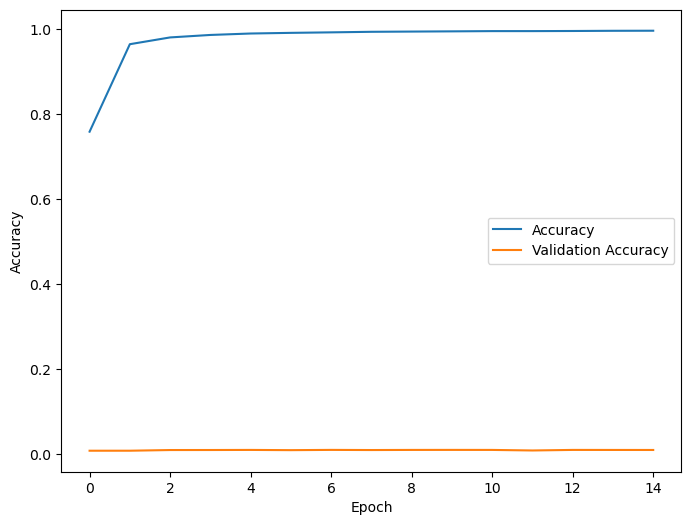

In [39]:
# Visualize training history

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [41]:
# Predict labels for the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

1896/1896 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step


In [42]:
# Compute confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

/Users/arul/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 2309 (\N{DEVANAGARI LETTER A}) missing from current font.
  fig.canvas.draw()
/Users/arul/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.draw()
/Users/arul/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 2306 (\N{DEVANAGARI SIGN ANUSVARA}) missing from current font.
  fig.canvas.draw()
/Users/arul/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 2307 (\N{DEVANAGARI SIGN VISARGA}) missing from current font.
  fig.canvas.draw()
/Users/arul/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 2310 (\N{DEVANAGARI LETTER AA}) missing from current font.
  fig.canvas.draw()
/Users/arul/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 2311 (\N{DEVANAGARI LETTER I}) missing from current font.
 

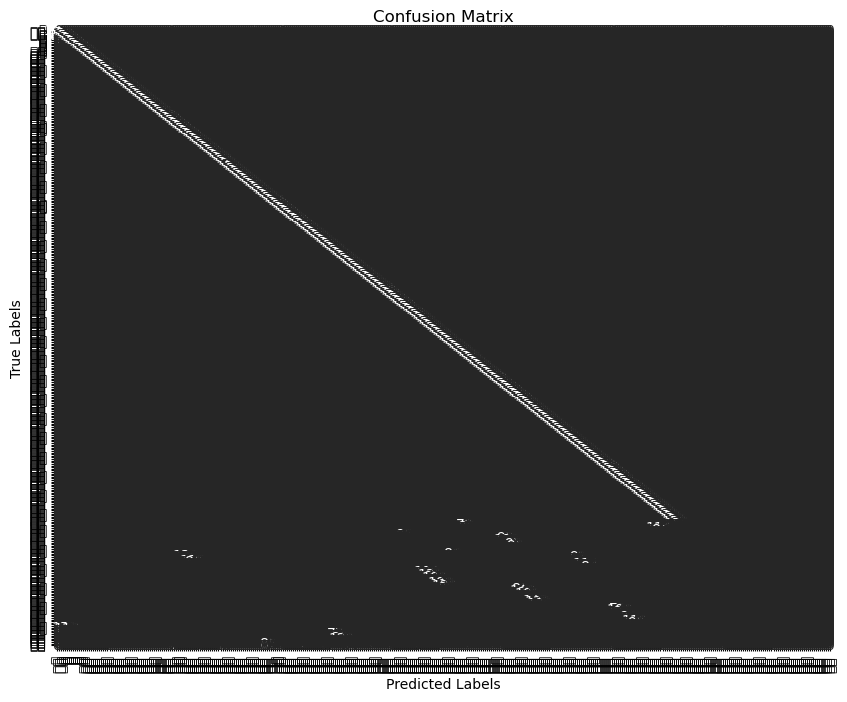

In [43]:
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [44]:
# Print classification report
print(classification_report(test_labels, predicted_labels, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

           अ       0.96      0.99      0.98       158
          अं       0.95      1.00      0.97       158
          अः       0.88      1.00      0.94       158
           आ       0.83      1.00      0.91       158
           इ       0.51      0.99      0.67       158
           ई       0.44      1.00      0.61       158
           उ       0.99      1.00      1.00       158
           ऊ       0.99      1.00      1.00       158
           ऋ       0.99      1.00      1.00       158
           ए       0.96      1.00      0.98       158
           ऐ       0.98      0.99      0.99       158
           ओ       0.95      1.00      0.97       158
           औ       0.84      1.00      0.91       158
           क       0.99      1.00      0.99       158
          कं       0.97      1.00      0.98       158
          कः       0.93      1.00      0.97       158
          का       0.95      1.00      0.97       158
          कि       0.88    

/Users/arul/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arul/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arul/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
# Visualize some predictions
num_samples = 10
random_indices = np.random.choice(len(test_images), num_samples, replace=False)

/Users/arul/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2343 (\N{DEVANAGARI LETTER DHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arul/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arul/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2379 (\N{DEVANAGARI VOWEL SIGN O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


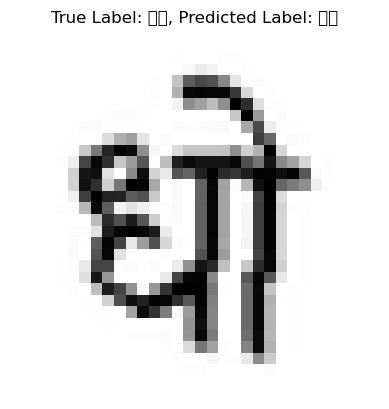

/Users/arul/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2357 (\N{DEVANAGARI LETTER VA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arul/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2306 (\N{DEVANAGARI SIGN ANUSVARA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arul/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2330 (\N{DEVANAGARI LETTER CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


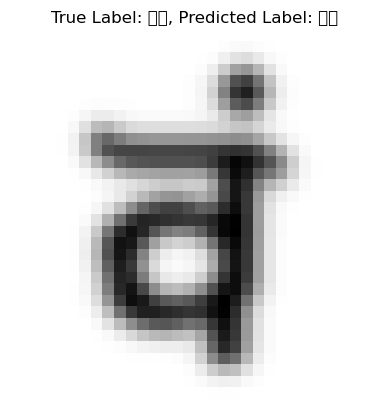

/Users/arul/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2337 (\N{DEVANAGARI LETTER DDA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arul/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2380 (\N{DEVANAGARI VOWEL SIGN AU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


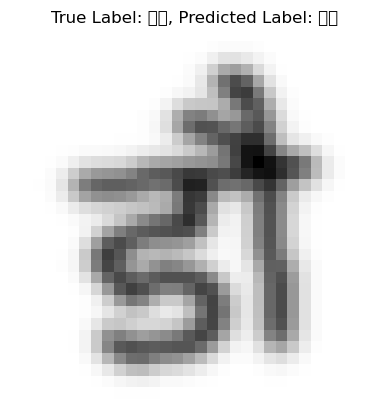

/Users/arul/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2359 (\N{DEVANAGARI LETTER SSA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arul/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arul/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2346 (\N{DEVANAGARI LETTER PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


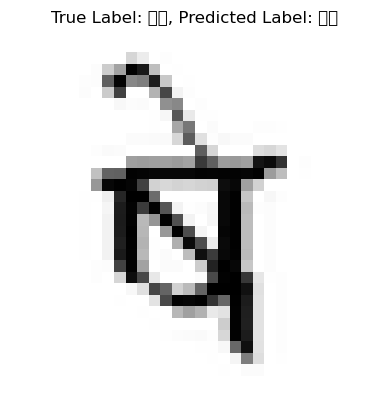

/Users/arul/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2348 (\N{DEVANAGARI LETTER BA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


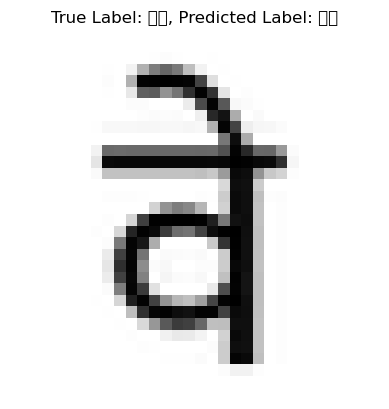

/Users/arul/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2338 (\N{DEVANAGARI LETTER DDHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


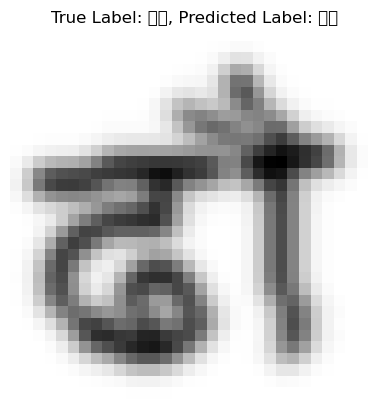

/Users/arul/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2327 (\N{DEVANAGARI LETTER GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arul/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


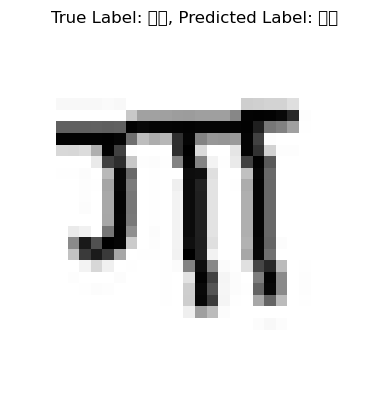

/Users/arul/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2347 (\N{DEVANAGARI LETTER PHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arul/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2367 (\N{DEVANAGARI VOWEL SIGN I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


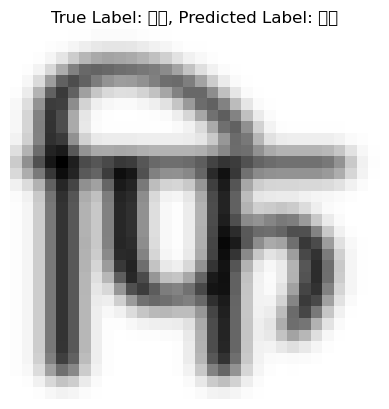

/Users/arul/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2368 (\N{DEVANAGARI VOWEL SIGN II}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


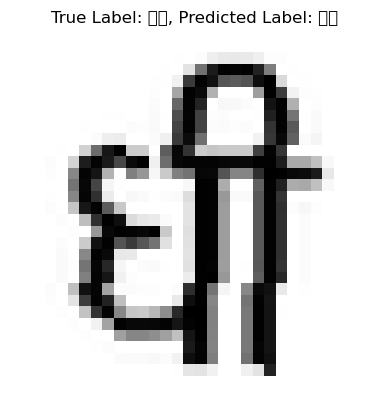

/Users/arul/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2358 (\N{DEVANAGARI LETTER SHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arul/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2307 (\N{DEVANAGARI SIGN VISARGA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arul/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2331 (\N{DEVANAGARI LETTER CHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


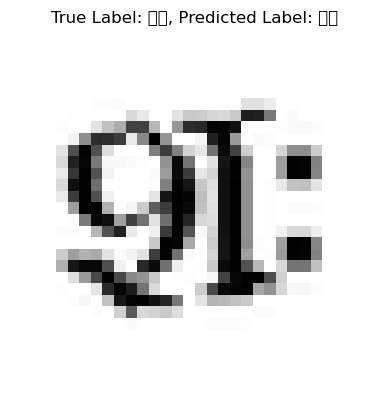

In [46]:
for idx in random_indices:
    img = test_images[idx].reshape(img_height, img_width)
    true_label = label_encoder.classes_[test_labels[idx]]
    predicted_label = label_encoder.classes_[predicted_labels[idx]]
    
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.title(f'True Label: {true_label}, Predicted Label: {predicted_label}')
    plt.axis('off')
    plt.show()

In [49]:
# Save model with .keras extension
model.save('hindi_character_recognition_model.keras')

In [50]:
# Load model
loaded_model = tf.keras.models.load_model('hindi_character_recognition_model.keras')


/Users/arul/anaconda3/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [51]:
# Example inference (assuming test_images are loaded and preprocessed)
predictions = loaded_model.predict(test_images)

1896/1896 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


# Question 1: 
## Can an AI/ML model be trained to generate an entire library from a chosen few characters? How?

Yes, an AI/ML model can be trained to generate an entire font library from a chosen few characters. This can be achieved using techniques such as Generative Adversarial Networks (GANs) or Variational Autoencoders (VAEs). These models can learn the style and structure of the input characters and generate new characters in the same style. The process involves:

Collecting a dataset of characters.

Preprocessing the data (normalization, resizing).

Training a GAN or VAE on the dataset.

Using the trained model to generate new characters by sampling from the learned distribution.

# Question 2: 
## Are there any existing models which can be used to do this?
Yes, there are existing models and frameworks that can be adapted for this purpose:

GANs (Generative Adversarial Networks): Models like DCGAN (Deep Convolutional GAN) can be used to generate new characters based on a few samples.

VAEs (Variational Autoencoders): VAEs can learn a latent representation of the character data and generate new characters from this representation.

Pre-trained Models: There are also pre-trained models available in repositories like GitHub and TensorFlow Hub that can be fine-tuned for generating characters in specific styles.